##### Nigel K. Gondo: Data Warrior Analytics

##### EXPRESS ENTRY STATISTICS

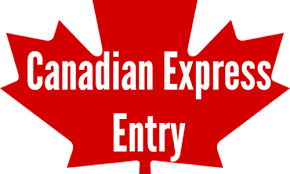

In [1]:
from PIL import Image
Image.open('canada1.png')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brief-description" data-toc-modified-id="Brief-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brief description</a></span></li><li><span><a href="#Importing-relevant-libraries-and-data" data-toc-modified-id="Importing-relevant-libraries-and-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing relevant libraries and data</a></span></li><li><span><a href="#Exploratory-data-analysis-(EDA)" data-toc-modified-id="Exploratory-data-analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Gender-statistics" data-toc-modified-id="Gender-statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gender statistics</a></span></li><li><span><a href="#Age-Statistics" data-toc-modified-id="Age-Statistics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Age Statistics</a></span></li><li><span><a href="#Occupations-statistics" data-toc-modified-id="Occupations-statistics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Occupations statistics</a></span></li><li><span><a href="#Continent-and-country-of-citizenship-statistics" data-toc-modified-id="Continent-and-country-of-citizenship-statistics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Continent and country of citizenship statistics</a></span><ul class="toc-item"><li><span><a href="#Continent-statistics" data-toc-modified-id="Continent-statistics-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Continent statistics</a></span></li><li><span><a href="#Country-of-citizenship-statistics" data-toc-modified-id="Country-of-citizenship-statistics-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Country of citizenship statistics</a></span></li></ul></li><li><span><a href="#Immigration-category-statistics" data-toc-modified-id="Immigration-category-statistics-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Immigration category statistics</a></span></li></ul></li></ul></div>

# Brief description

Express entry is an immigration pathway into Canada to obtain permanent residency (PR) for skilled workers in Canada and those overseas. The program started on the 1st of January 2015 and hundreds of thousands of people have been privileged to get PR since then. Therefore, the purpose of this project was to highlight the various express entry statistics, from 2015 to 2022, of the number of individuals admitted for PR based on gender, age, intended occupation, country of citizenship of the applicants and the province they intend to live in.

# Importing relevant libraries and data

In [2]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot as gplt
import geopandas as gpd
import squarify
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
sns.set()
sns.set_style('white')
pd.options.display.float_format='{:,}'.format

In [3]:
#Importing data
df_country_of_citizenship = pd.read_excel('PR  admission by country of citizenship and territory.xlsx')
df_immigration_category = pd.read_excel('PR  admission by immigration category and territory.xlsx')
df_age_group = pd.read_excel('PR admission by age group and territory.xlsx')
df_occupation = pd.read_excel('PR admission by intended occupation and territory.xlsx')
df_gender = pd.read_excel('PR admmission by gender and territory.xlsx')

# Exploratory data analysis (EDA)

## Gender statistics

In [4]:
#Viewing the first 5 rows of the dataframe
df_gender.head()

,Year,Month,Quarter,Gender,Province,Admissions of Permanent Residenst under Express Entry by Territory and Gender
0,2015,Jan,Q1,Female,Newfoundland and Labrador,0
1,2015,Feb,Q1,Female,Newfoundland and Labrador,0
2,2015,Mar,Q1,Female,Newfoundland and Labrador,0
3,2015,Apr,Q2,Female,Newfoundland and Labrador,0
4,2015,May,Q2,Female,Newfoundland and Labrador,0


In [5]:
#Grouping the data frame by gender so as to calculate the overall admissions  for PR from 2015 to 2022 by gender
df_gender_grouped_overall = df_gender\
                            .groupby('Gender')\
                            .sum()\
                            .drop('Year', 
                                  axis=1)

df_gender_grouped_overall.style.format('{:,}')

,Admissions of Permanent Residenst under Express Entry by Territory and Gender
Gender,
Female,"301,570"
Male,"344,160"


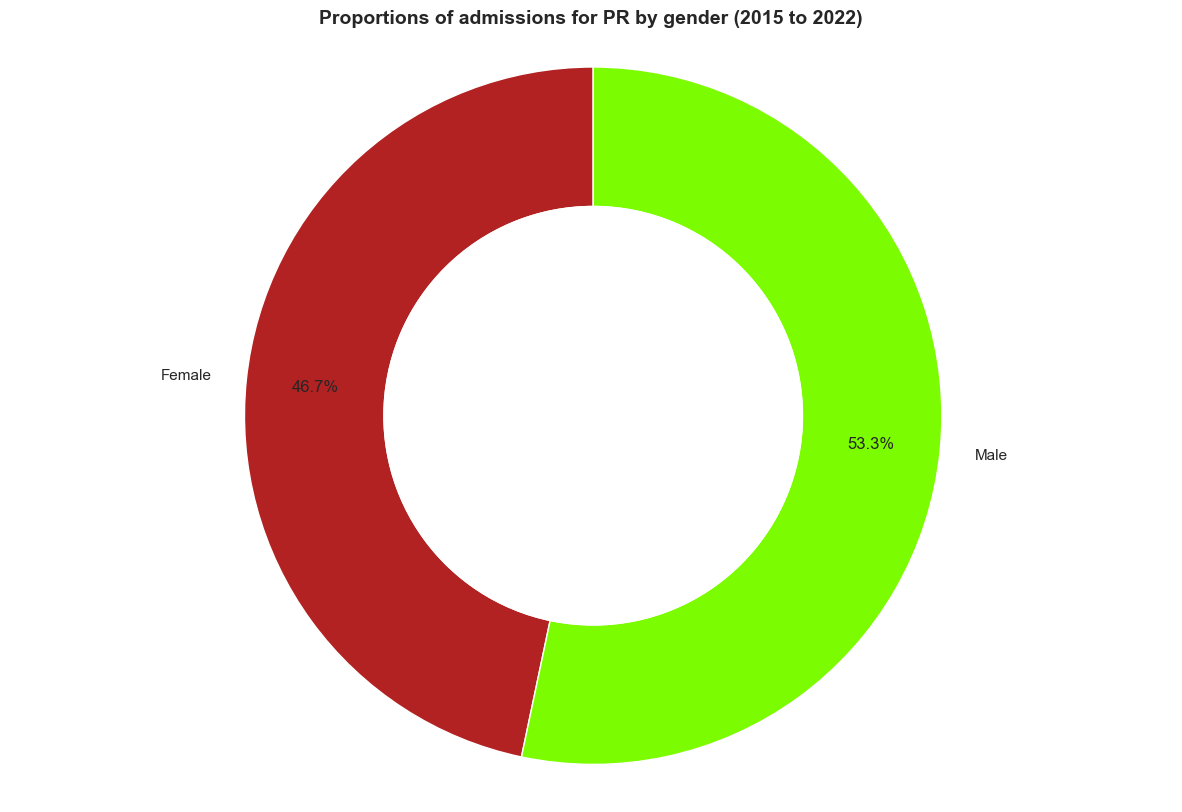

In [6]:
#Plotting donut chart for 2015 to 2022

#Creating lists of the labels and values
labels=list(df_gender_grouped_overall.index)

values=list(df_gender_grouped_overall['Admissions of Permanent Residenst under Express Entry by Territory and Gender'])

#Plotting the donut chart
plt.pie(values, 
        labels=labels, 
        colors=['firebrick','lawngreen'], 
        autopct='%1.1f%%', 
        pctdistance=0.8,
        startangle=90, 
        wedgeprops={'width': 0.4})

circle = plt.Circle((0, 0), 
                    radius=0.6, 
                    color='white')

plt.gca().add_artist(circle)

plt.axis('equal')

plt.title('Proportions of admissions for PR by gender (2015 to 2022)', 
          fontsize=14, 
          fontweight='bold')

plt.show()

In [7]:
#Filtering the datafreame for the year 2015 and grouping by gender 
df_gender_grouped_2015 = df_gender\
                        .where(df_gender['Year']==2015)\
                        .dropna()\
                        .groupby('Gender')\
                        .sum()\
                        .drop('Year', 
                              axis=1)

df_gender_grouped_2015

,Admissions of Permanent Residenst under Express Entry by Territory and Gender
Gender,
Female,"4,340.0"
Male,"5,365.0"


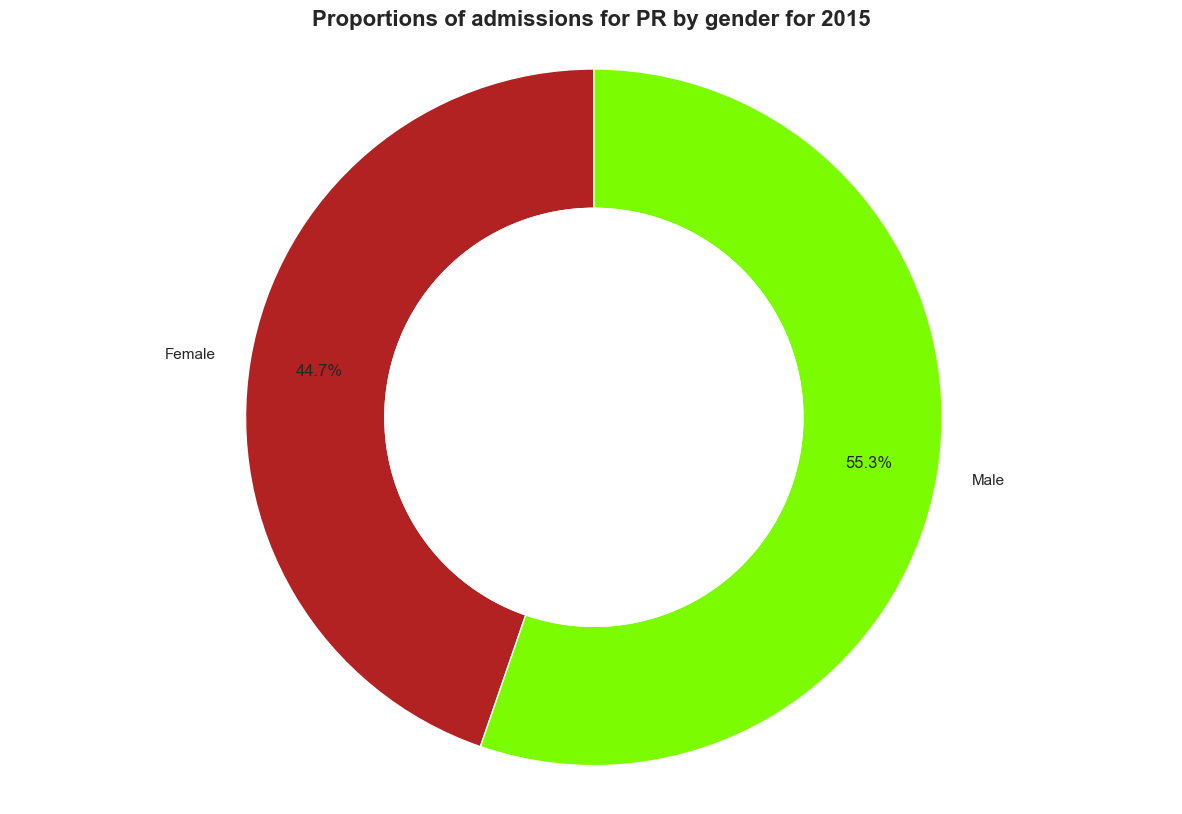

In [8]:
#Plotting donut chart for 2015

#Creating lists of the labels and values
labels=list(df_gender_grouped_2015.index)

values= list(df_gender_grouped_2015['Admissions of Permanent Residenst under Express Entry by Territory and Gender'])

#Plotting chart
plt.pie(values, 
        labels=labels, 
        colors=['firebrick','lawngreen'], 
        autopct='%1.1f%%', 
        pctdistance=0.8,
        startangle=90, 
        wedgeprops={'width': 0.4})

circle = plt.Circle((0, 0), 
                    radius=0.6, 
                    color='white')

plt.gca().add_artist(circle)

plt.axis('equal')

plt.title('Proportions of admissions for PR by gender for 2015', 
          fontsize=16, 
          fontweight='bold')

plt.show()

In [9]:
#Filtering the datafreame for the year 2022 and grouping by gender 
df_gender_grouped_2022 = df_gender\
                        .where(df_gender['Year']==2022)\
                        .dropna().groupby('Gender')\
                        .sum()\
                        .drop('Year', 
                              axis=1)

df_gender_grouped_2022

,Admissions of Permanent Residenst under Express Entry by Territory and Gender
Gender,
Female,"56,075.0"
Male,"60,035.0"


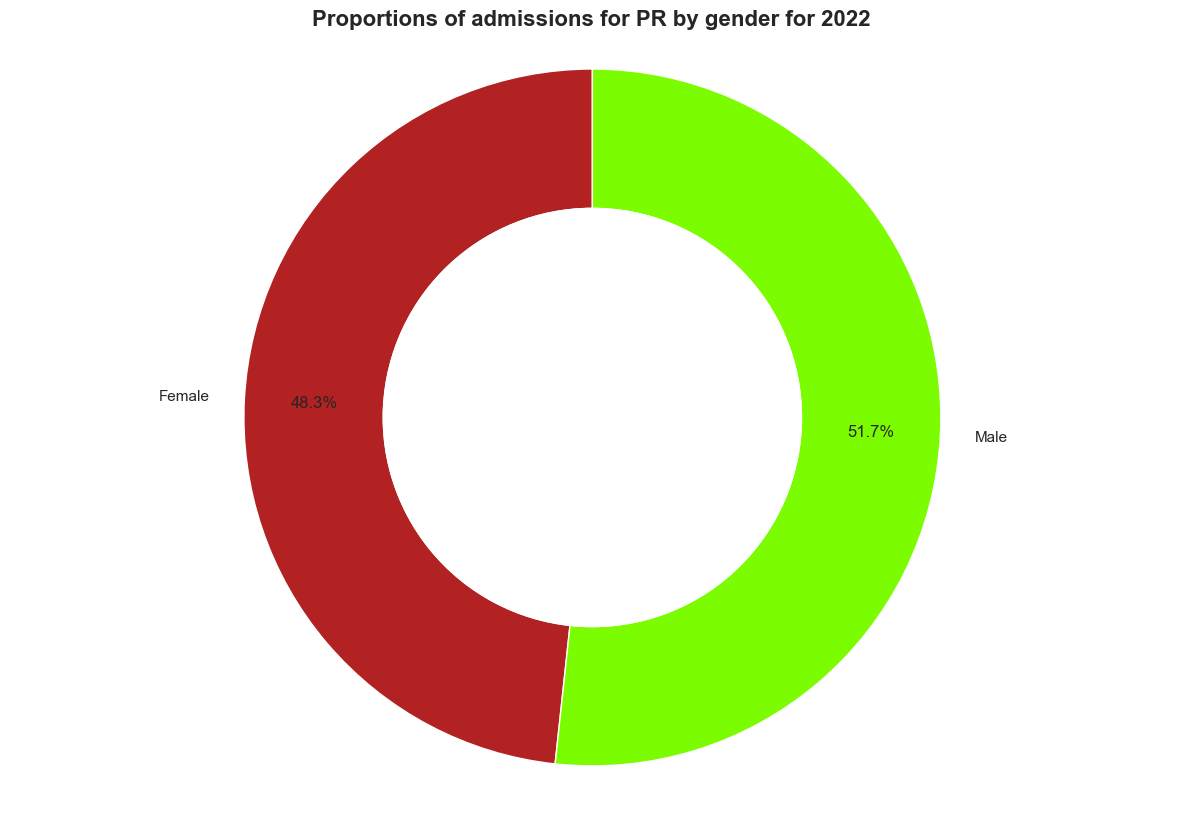

In [10]:
#Plotting donut chart for 2022

#Creating lists of the labels and values
labels=list(df_gender_grouped_2022.index)

values= list(df_gender_grouped_2022['Admissions of Permanent Residenst under Express Entry by Territory and Gender'])

#Plotting the donut chart
plt.pie(values, 
        labels=labels, 
        colors=['firebrick','lawngreen'], 
        autopct='%1.1f%%', 
        pctdistance=0.8,
        startangle=90, 
        wedgeprops={'width': 0.4})

circle = plt.Circle((0, 0), 
                    radius=0.6, 
                    color='white')

plt.gca().add_artist(circle)

plt.axis('equal')

plt.title('Proportions of admissions for PR by gender for 2022', 
          fontsize=16, 
          fontweight='bold')

plt.show()

**COMMENTS ON GENDER**

Since express entry started in 2015 till 2022, more men have been admitted for PR. However, the gender gap has improved, because in 2015 only 44.7% of women got admitted for PR and now in 2022 that has jumped to 48.3% which is above the overall of 46.7%.

## Age Statistics

In [11]:
#Viewing the first 5 rows of the dataframe
df_age_group.head()

,Year,Month,Quarter,Age Group,Province,Admissions of Permanent Residenst under Express Entry by Territory and Age Group
0,2015,Jan,Q1,0 to 14 years old,Newfoundland and Labrador,0
1,2015,Feb,Q1,0 to 14 years old,Newfoundland and Labrador,0
2,2015,Mar,Q1,0 to 14 years old,Newfoundland and Labrador,0
3,2015,Apr,Q2,0 to 14 years old,Newfoundland and Labrador,0
4,2015,May,Q2,0 to 14 years old,Newfoundland and Labrador,0


In [12]:
#Grouping the data frame by age group so as to calculate the overall admissions for PR from 2015 to 2022 by age group
df_age_group_overall = df_age_group.groupby('Age Group')\
                        .sum()\
                        .drop(['75 years old or more', 'Age not stated'], 
                              axis=0)\
                        .drop('Year', 
                              axis=1)\
                        .sort_values(by='Admissions of Permanent Residenst under Express Entry by Territory and Age Group', 
                            ascending=False)

df_age_group_overall.style.format('{:,}')

,Admissions of Permanent Residenst under Express Entry by Territory and Age Group
Age Group,
30 to 44 years old,"283,720"
15 to 29 years old,"242,875"
0 to 14 years old,"103,180"
45 to 59 years old,"14,450"
60 to 74 years old,215


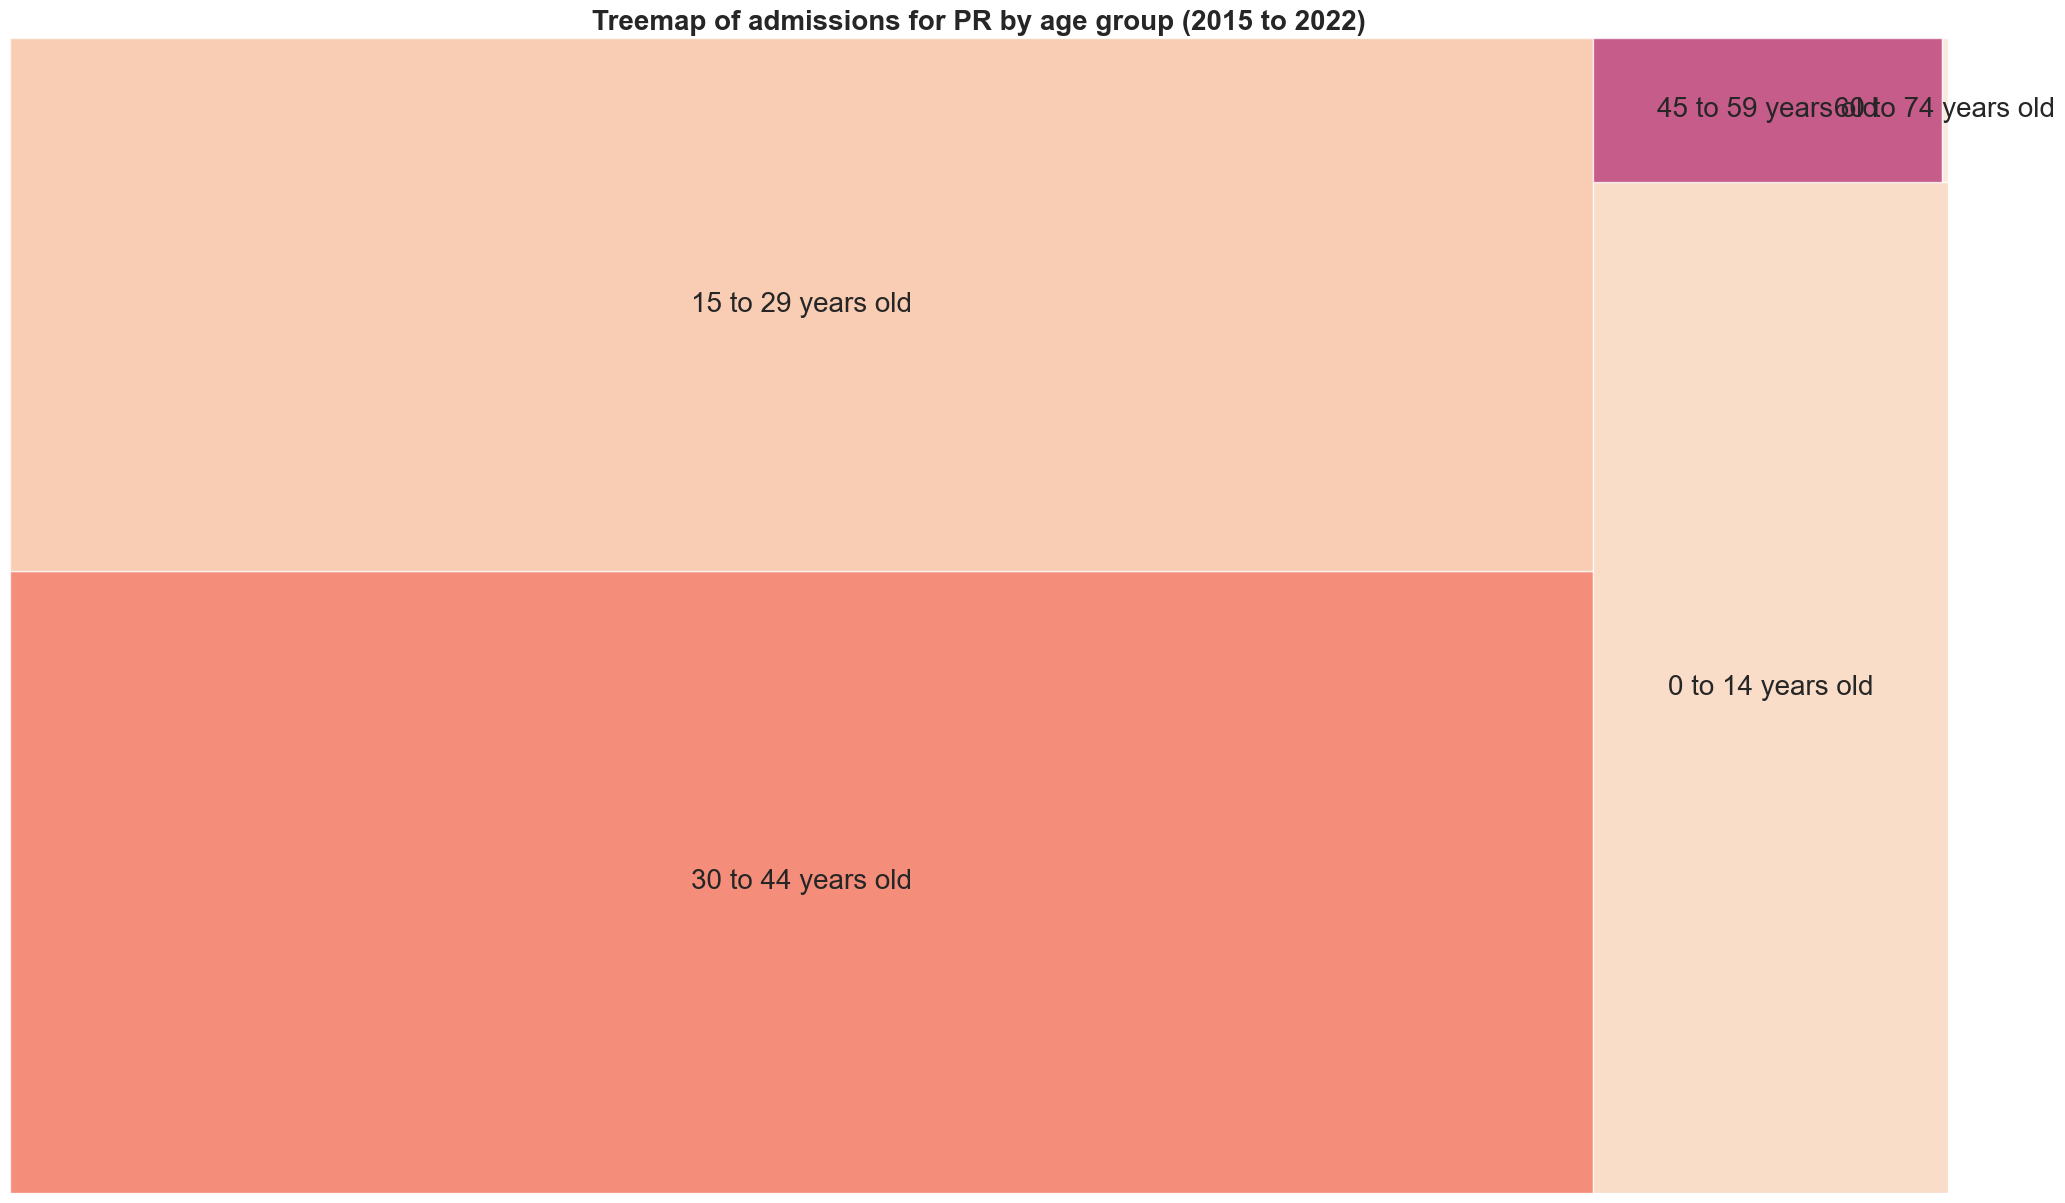

In [13]:
#Plotting treemap of PR admissions by age group from 2015 to 2022

#Creating lists of the labels and values
labels=list(df_age_group_overall.index)

values= list(df_age_group_overall['Admissions of Permanent Residenst under Express Entry by Territory and Age Group'])

#Plotting treemap chart
plt.figure(figsize=(25,15))

squarify.plot(sizes=values, 
              label=labels, 
              pad=False, 
              bar_kwargs={'alpha':.7}, 
              text_kwargs={'fontsize':20})

plt.title('Treemap of admissions for PR by age group (2015 to 2022)', 
          fontweight='bold', 
          fontsize = 20)

plt.axis('off');

In [14]:
#Grouping the data frame by age group so as to calculate the admissions for 2015
df_age_group_2015 = df_age_group\
                    .where(df_age_group['Year']==2015)\
                    .dropna()\
                    .groupby('Age Group')\
                    .sum()\
                    .drop('Year', axis=1)\
                    .drop(['60 to 74 years old', '75 years old or more','Age not stated'], 
                          axis=0)\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Territory and Age Group', 
                                 ascending=False)

df_age_group_2015

,Admissions of Permanent Residenst under Express Entry by Territory and Age Group
Age Group,
30 to 44 years old,"4,805.0"
15 to 29 years old,"2,850.0"
0 to 14 years old,"1,450.0"
45 to 59 years old,470.0


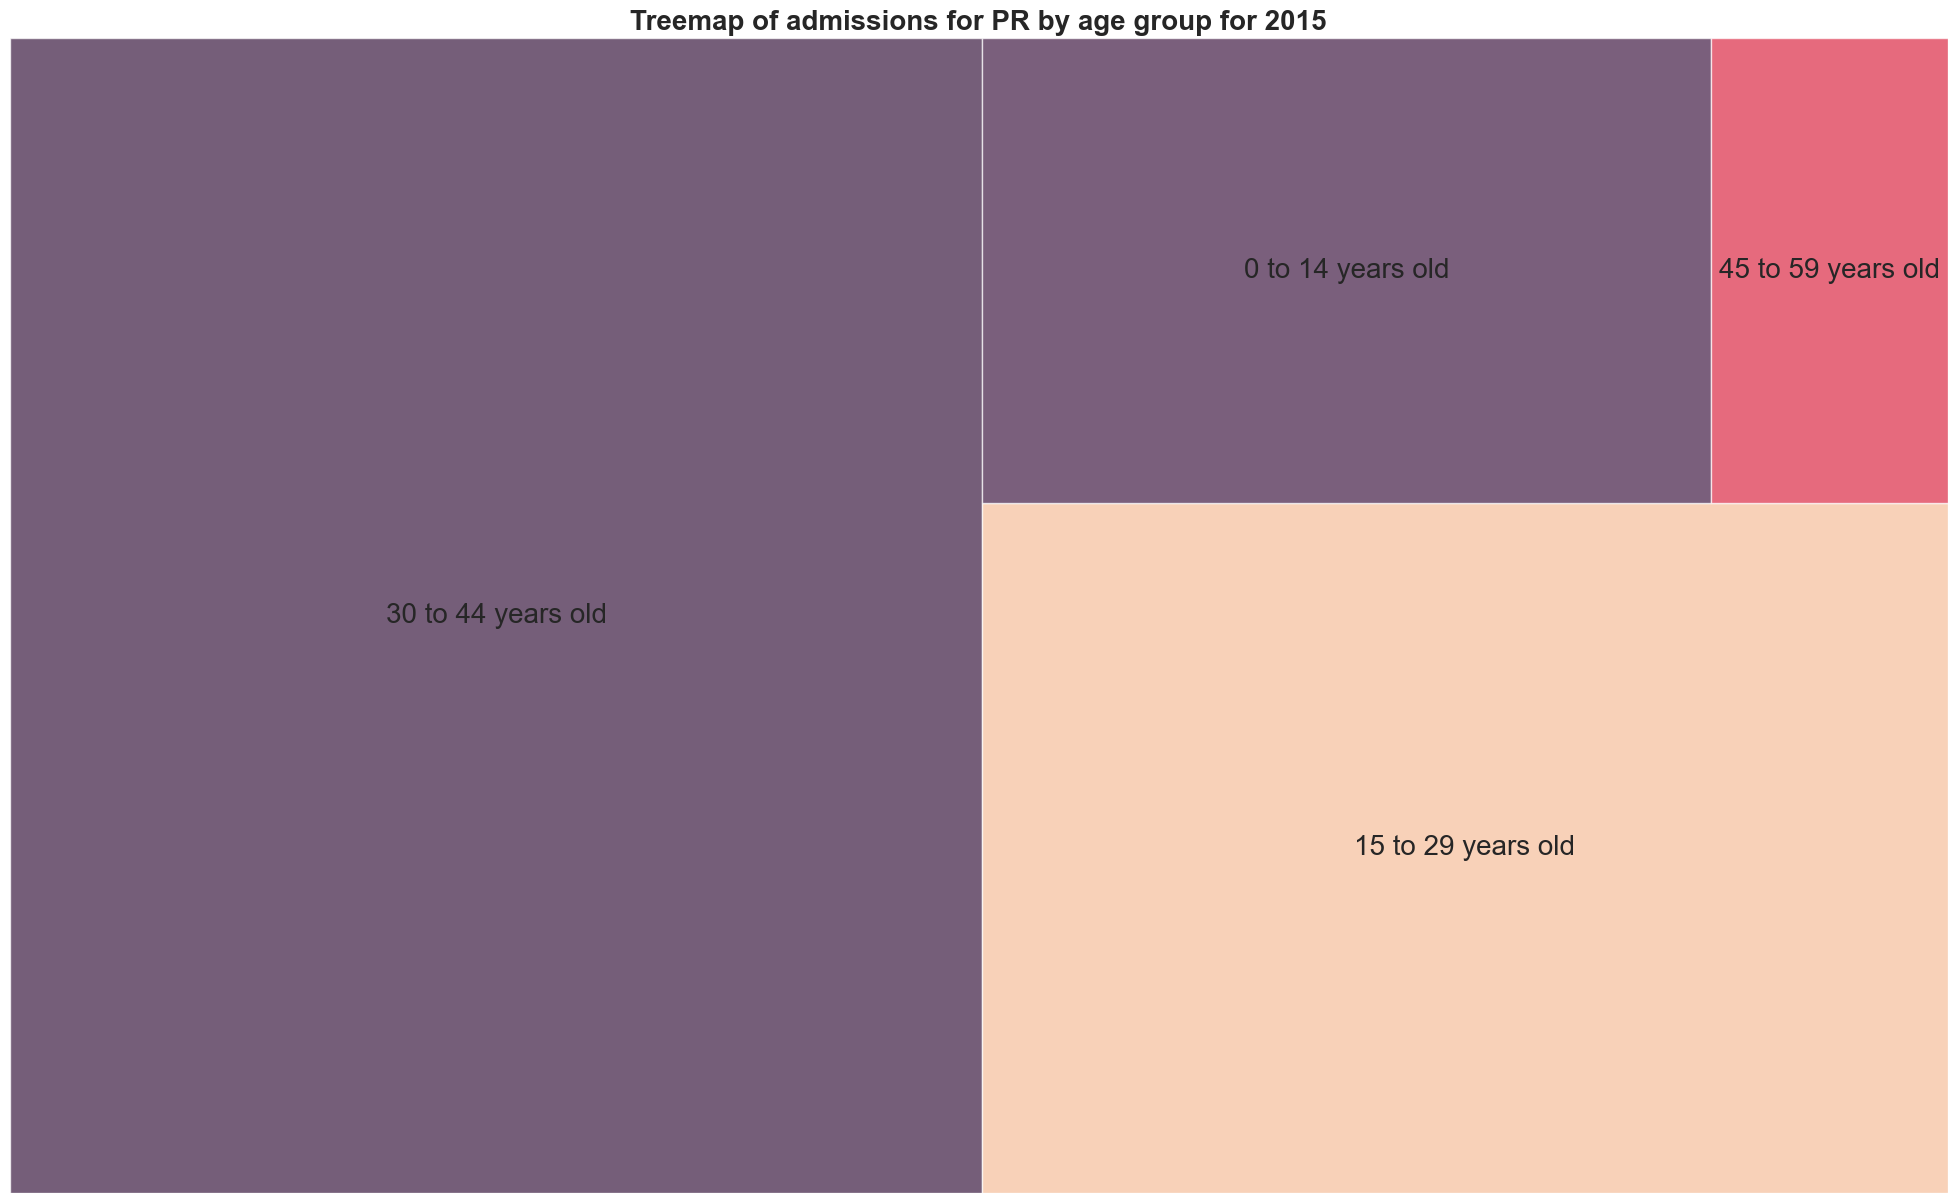

In [15]:
#Treemap of PR admissions by age group for 2015

#Creating lists of the labels and values
labels=list(df_age_group_2015.index)

values= list(df_age_group_2015['Admissions of Permanent Residenst under Express Entry by Territory and Age Group'])

#plotting the treemap chart
plt.figure(figsize=(25,15))

squarify.plot(sizes=values, 
              label=labels, 
              pad=False, 
              bar_kwargs={'alpha':.7}, 
              text_kwargs={'fontsize':20})

plt.title('Treemap of admissions for PR by age group for 2015', 
          fontweight='bold', 
          fontsize = 20)

plt.axis('off');

In [16]:
#Grouping the data frame by age group so as to calculate the admissions for 2022
df_age_group_2022 = df_age_group\
                    .where(df_age_group['Year']==2022)\
                    .dropna()\
                    .groupby('Age Group')\
                    .sum()\
                    .drop('Year', 
                          axis=1)\
                    .drop(['75 years old or more','Age not stated'], 
                          axis = 0)\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Territory and Age Group', 
                                 ascending=False)

df_age_group_2022

,Admissions of Permanent Residenst under Express Entry by Territory and Age Group
Age Group,
30 to 44 years old,"58,230.0"
15 to 29 years old,"30,545.0"
0 to 14 years old,"23,885.0"
45 to 59 years old,"3,295.0"
60 to 74 years old,40.0


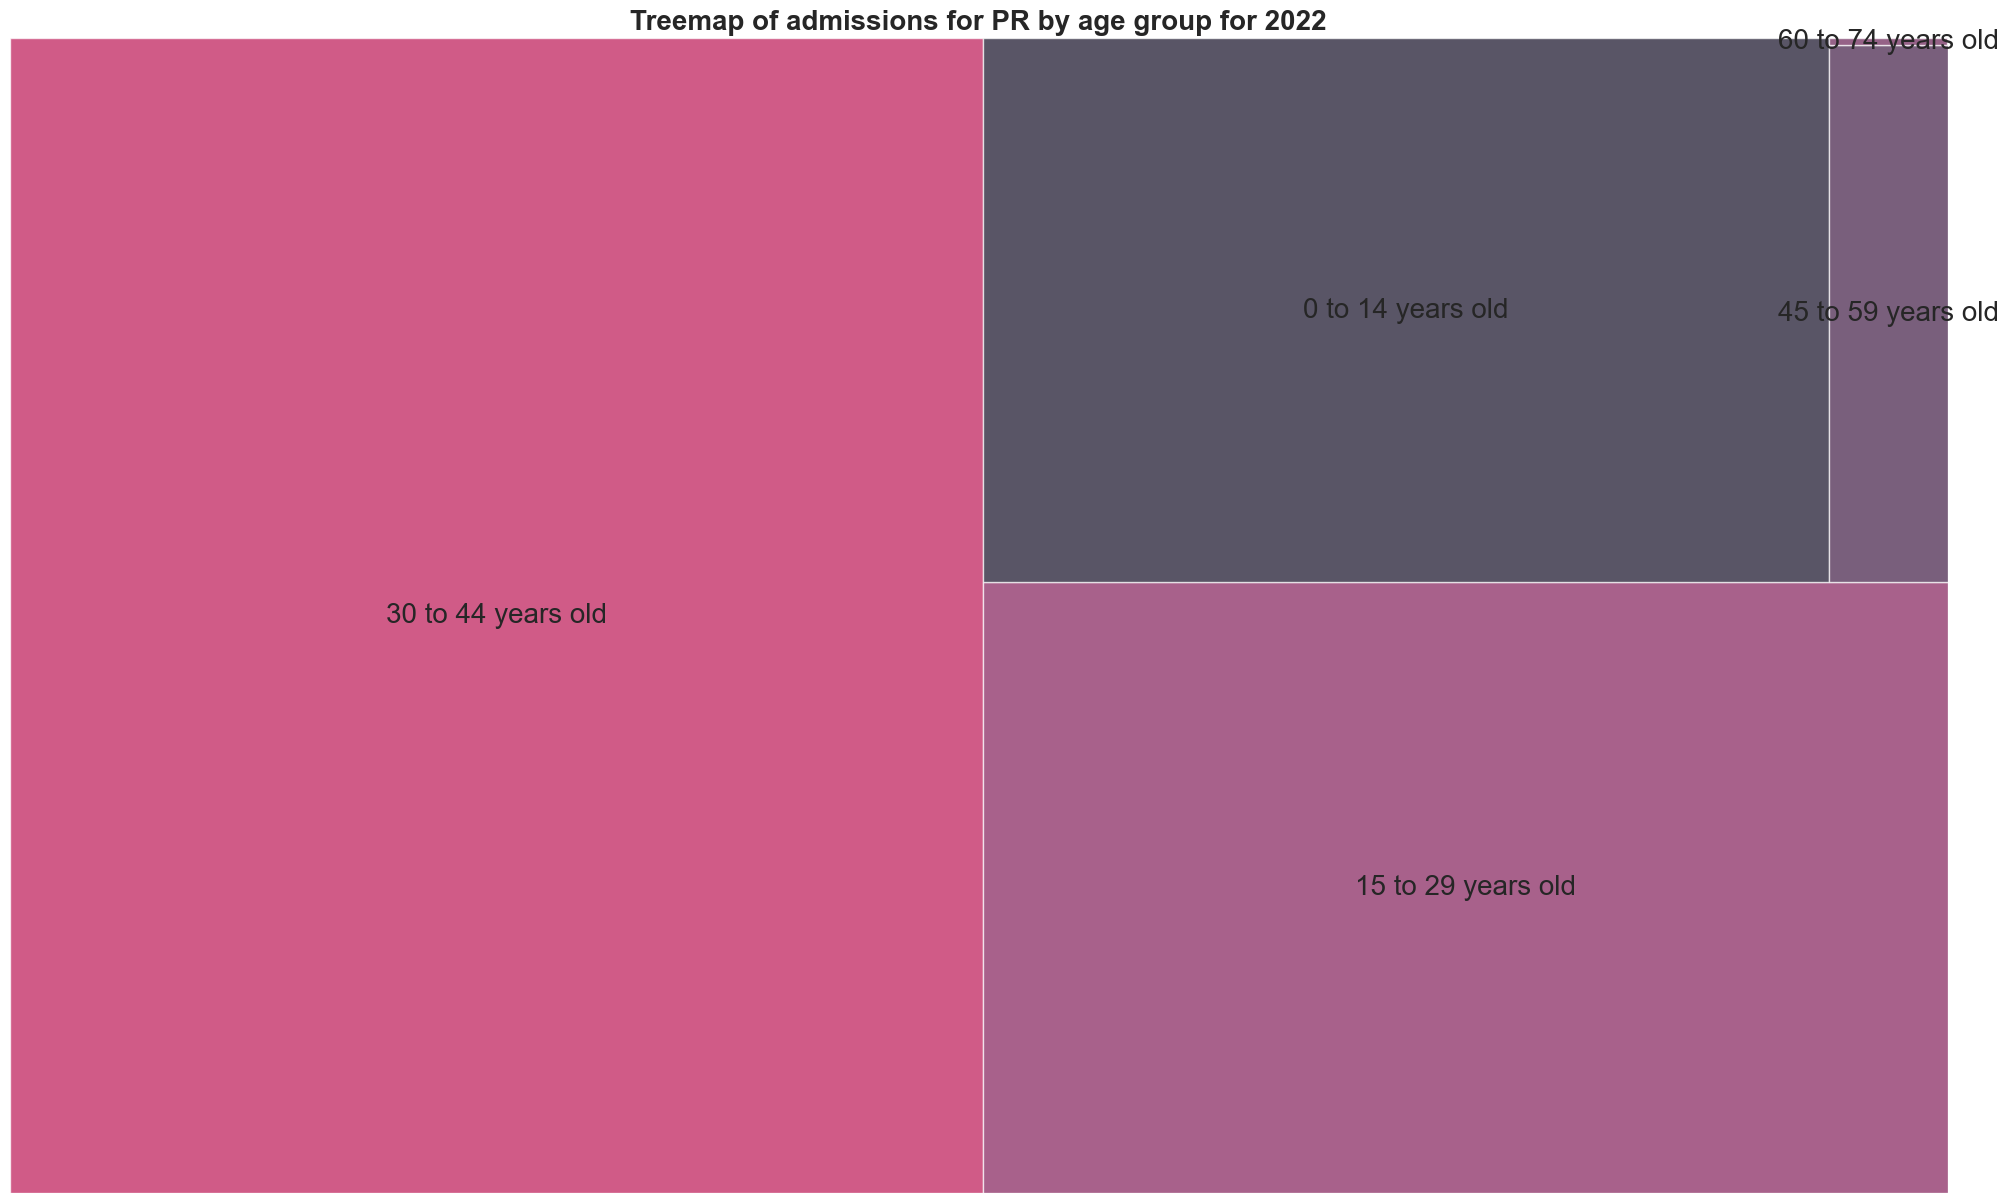

In [17]:
#Tree map of PR admissions by age group for 2022

#creating lists of the labels and values
labels=list(df_age_group_2022.index)

values= list(df_age_group_2022['Admissions of Permanent Residenst under Express Entry by Territory and Age Group'])

#Plotting the treemap chart
plt.figure(figsize=(25,15))

squarify.plot(sizes=values, 
              label=labels, 
              pad=False, 
              bar_kwargs={'alpha':.7}, 
              text_kwargs={'fontsize':20})

plt.title('Treemap of admissions for PR by age group for 2022', 
          fontweight='bold', 
          fontsize=20)

plt.axis('off');

**COMMENTS ON AGE GROUP**

From the tree maps above, it is evident that the two largest age groups by admissions for PR are 30 to 44 years old and 15 to 29 years old, with the former receiving more admissions for PR. This could possibly be due to individuals who are between 30 to 44 years are in the prime of their professional careers and provide vital skills that add to the growth of Canada’s economy. 

Those who are much younger between 0 to 14 years, and those above 45 years constitute a smaller population of those admitted for PR; these groups could be accompanying children and spouses of the main applicant.


## Occupations statistics

In [18]:
#Viewing the first 5 rows of the dataframe
df_occupation.head()

,Year,Month,Quarter,Occupation,Province,Admissions of Permanent Residenst under Express Entry by Territory and Intended Occupation
0,2015,Jan,Q1,00 - Senior management occupations,Newfoundland and Labrador,0
1,2015,Feb,Q1,00 - Senior management occupations,Newfoundland and Labrador,0
2,2015,Mar,Q1,00 - Senior management occupations,Newfoundland and Labrador,0
3,2015,Apr,Q2,00 - Senior management occupations,Newfoundland and Labrador,0
4,2015,May,Q2,00 - Senior management occupations,Newfoundland and Labrador,0


In [19]:
#Grouping the dataframe by occupation so as to calculate the overall admissions from 2015 to 2022 by occupation
df_occupation_overall = df_occupation\
                        .groupby('Occupation')\
                        .sum()\
                        .sort_values(by='Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation', 
                                     ascending=True )\
                        .iloc[-10:]\
                        .drop('Year', 
                              axis=1)

df_occupation_overall.style.format('{:,}')

,Admissions of Permanent Residenst under Express Entry by Territory and Intended Occupation
Occupation,
"41 - Professional occupations in law and social, community and government services","10,165"
06 - Middle management occupations in retail and wholesale trade and customer services,"15,280"
40 - Professional occupations in education services,"15,735"
63 - Service supervisors and specialized service occupations,"20,765"
01-05 - Specialized middle management occupations,"24,710"
22 - Technical occupations related to natural and applied sciences,"28,255"
11 - Professional occupations in business and finance,"32,950"
12 - Administrative and financial supervisors and administrative occupations,"36,410"
21 - Professional occupations in natural and applied sciences,"89,915"


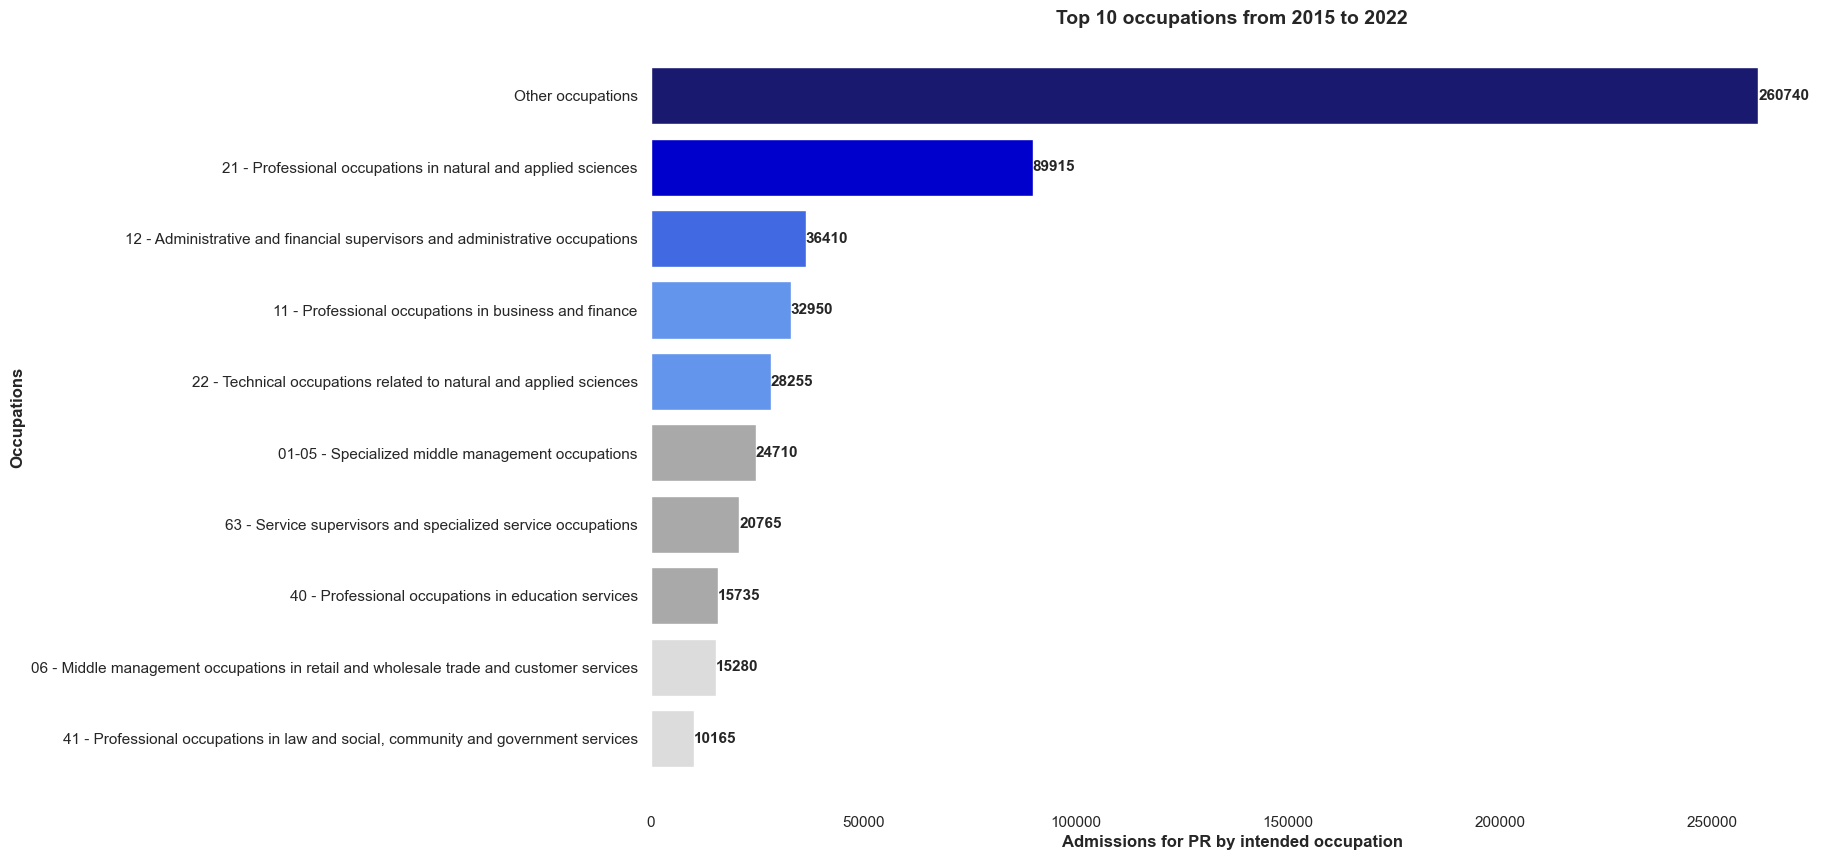

In [20]:
#Visualizing the overall top 10 occupations from 2015 to 2022

#Plotting bar chart
plt.barh(df_occupation_overall.index, 
        df_occupation_overall['Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation'], 
         color=['gainsboro', 
                'gainsboro', 
                'darkgrey', 
                'darkgrey',
                'darkgrey', 
                'cornflowerblue',
                'cornflowerblue', 
                'royalblue', 
                'mediumblue', 
                'midnightblue'])

plt.xlabel('Admissions for PR by intended occupation', 
           fontsize=12,
           fontweight='bold')

plt.ylabel('Occupations', 
           fontsize=12,
           fontweight='bold')

plt.title('Top 10 occupations from 2015 to 2022', 
          fontsize=14, 
          fontweight='bold')

# Adding data labels
x = df_occupation_overall.to_numpy()
y = df_occupation_overall.index.to_numpy()
labels = list(df_occupation_overall['Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation'])
for i in range(len(x)):
    plt.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')


plt.box(False)

plt.show()

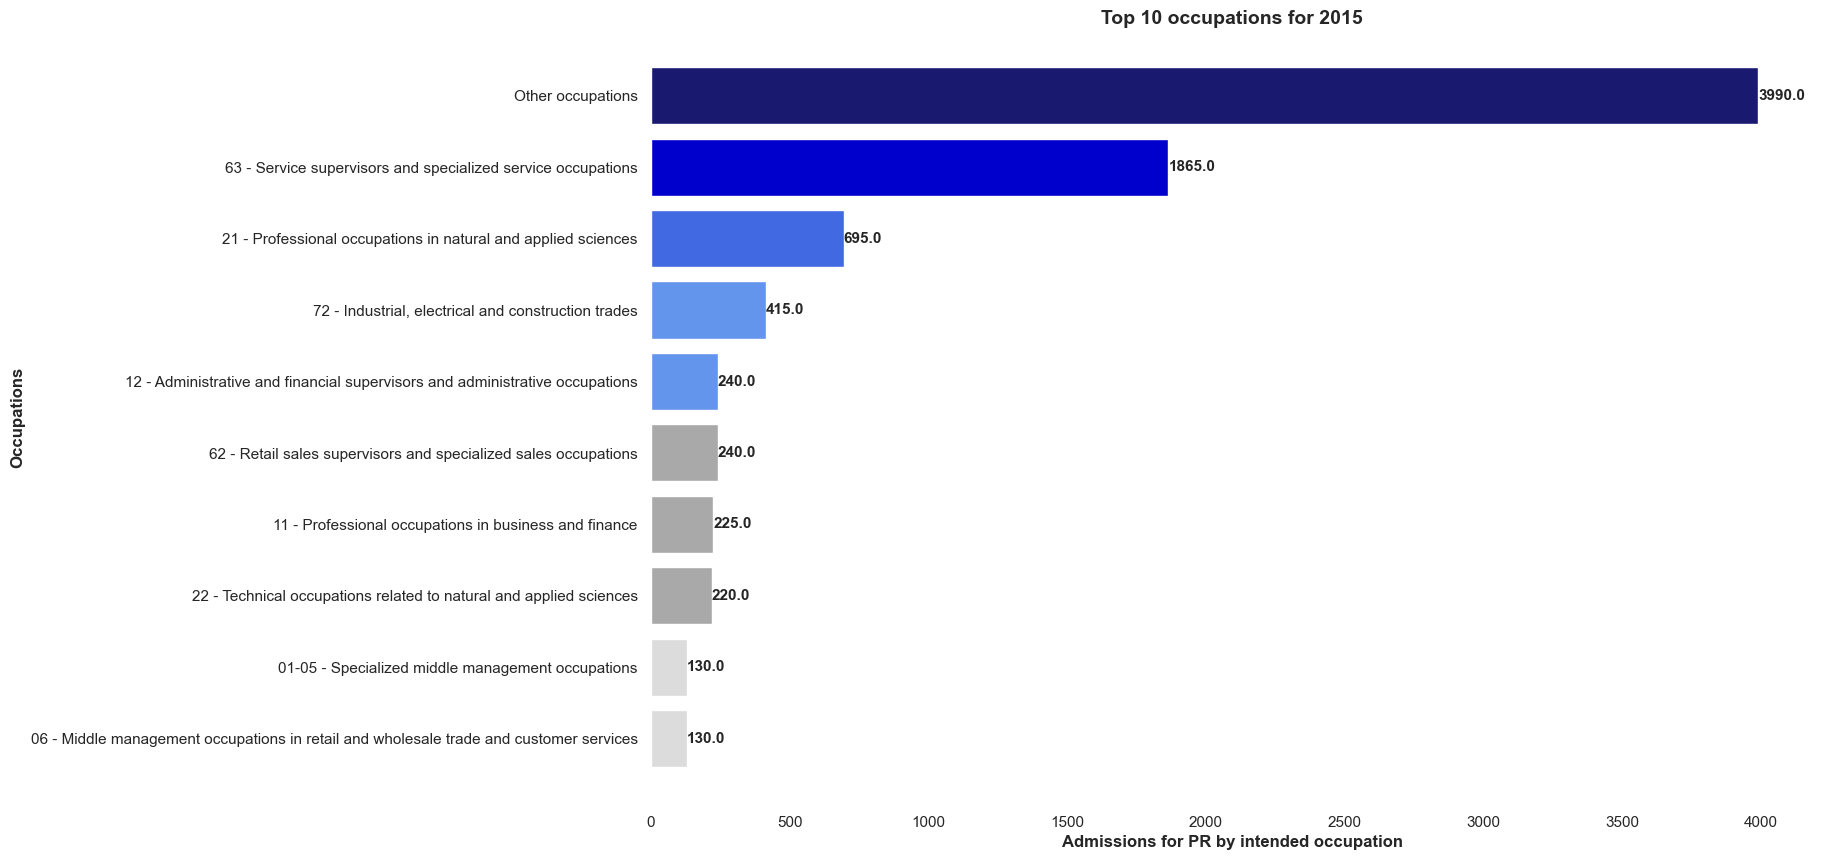

In [21]:
#Visualizing the top 10 intended occupations by applicants for PR 2015

#Filtering for the year 2015 then grouping by occupation and extracting the top 10 occupations
df_occupation_2015 = df_occupation\
                    .where(df_occupation['Year']==2015)\
                    .groupby('Occupation')\
                    .sum()\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation', 
                                 ascending=True)\
                    .iloc[-10:]\
                    .drop('Year', 
                          axis=1) 

#Plotting the bar chart
plt.barh(df_occupation_2015.index, 
        df_occupation_2015['Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation'], 
         color=['gainsboro', 
                'gainsboro', 
                'darkgrey', 
                'darkgrey',
                'darkgrey', 
                'cornflowerblue',
                'cornflowerblue', 
                'royalblue', 
                'mediumblue', 
                'midnightblue'])

plt.xlabel('Admissions for PR by intended occupation', 
           fontsize=12,
           fontweight='bold')

plt.ylabel('Occupations', 
           fontsize=12,
           fontweight='bold')

plt.title('Top 10 occupations for 2015', 
          fontsize=14, 
          fontweight='bold')

#Adding data labels
x=df_occupation_2015.to_numpy()
y=df_occupation_2015.index.to_numpy()
labels = list(df_occupation_2015['Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation'])
for i in range(len(x)):
    plt.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')


plt.box(False)

plt.show()

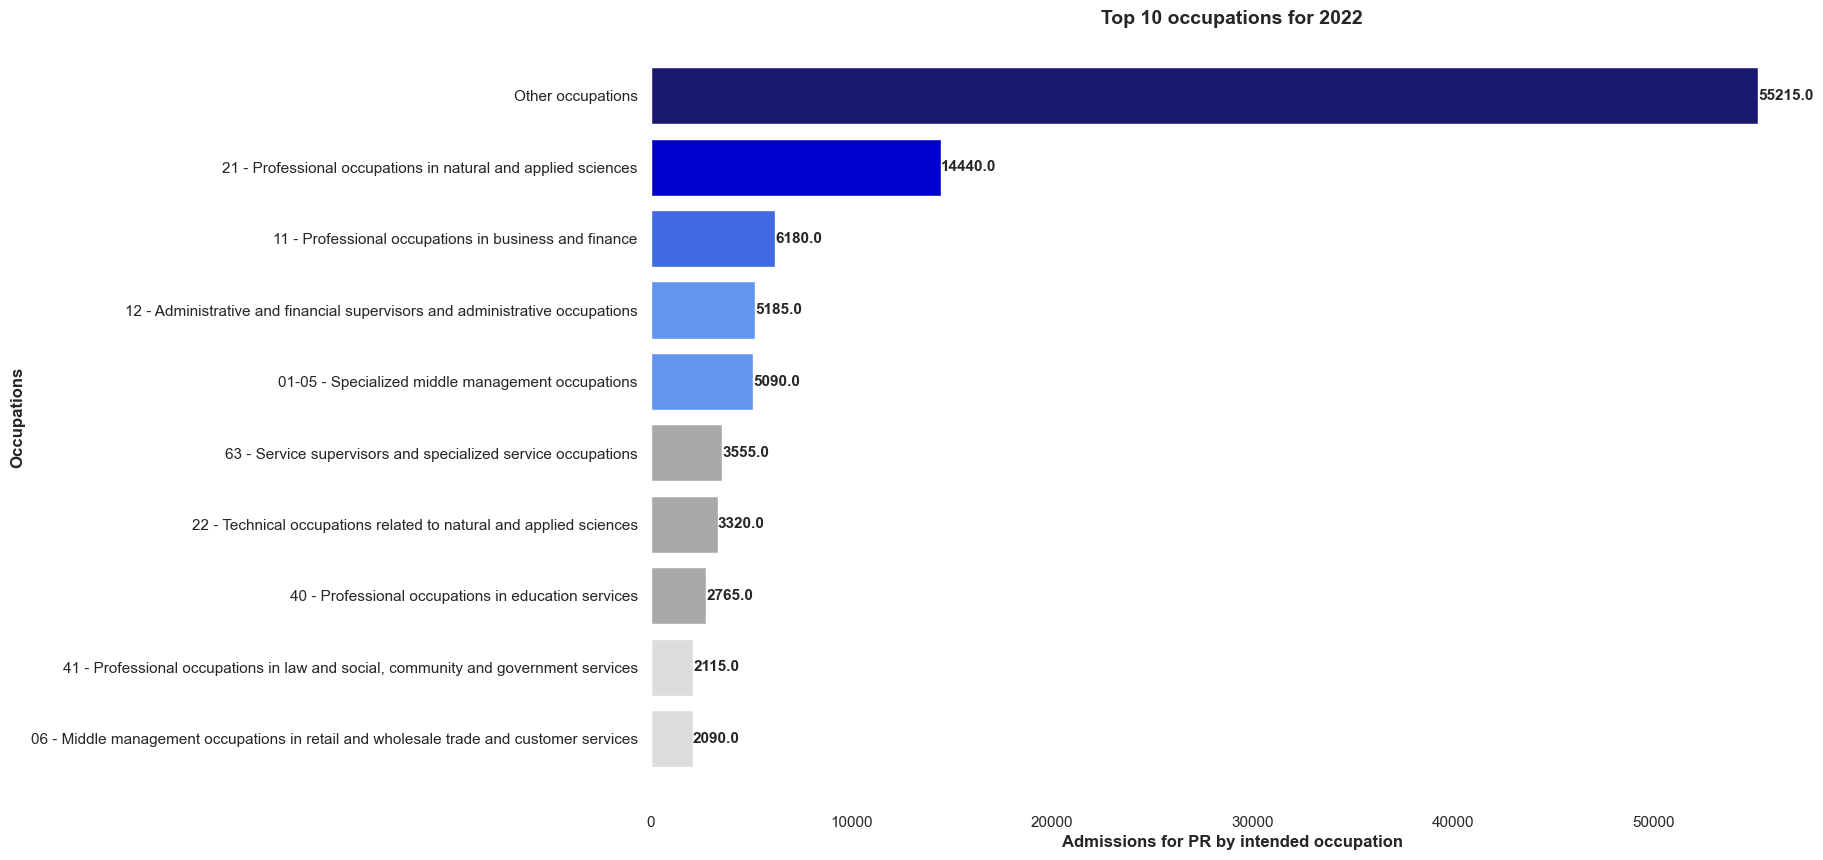

In [22]:
#Visualizing the top 10 intended occupations by applicants for PR 2022

#Filtering for the year 2022 then grouping by occupation and extracting the top 10 occupations
df_occupation_2022 = df_occupation\
                    .where(df_occupation['Year']==2022)\
                    .groupby('Occupation')\
                    .sum()\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation', 
                                 ascending=True)\
                    .iloc[-10:]\
                    .drop('Year', 
                          axis=1) 

#Plotting the bar chart
plt.barh(df_occupation_2022.index, 
        df_occupation_2022['Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation'], 
         color=['gainsboro', 
                'gainsboro', 
                'darkgrey', 
                'darkgrey',
                'darkgrey', 
                'cornflowerblue',
                'cornflowerblue', 
                'royalblue', 
                'mediumblue', 
                'midnightblue'])

plt.xlabel('Admissions for PR by intended occupation', 
           fontsize=12,
           fontweight='bold')

plt.ylabel('Occupations', 
           fontsize=12,
           fontweight='bold')

plt.title('Top 10 occupations for 2022', 
          fontsize=14, 
          fontweight='bold')

#Adding data labels
x = df_occupation_2022.to_numpy()
y = df_occupation_2022.index.to_numpy()
labels = list(df_occupation_2022['Admissions of Permanent Residenst under Express Entry by Territory and  Intended Occupation'])
for i in range(len(x)):
    plt.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')


plt.box(False)

plt.show()

**COMMENTS ON OCCUPATION**

The top 10 occupations have been consistent since 2015 with the occupations ranging from supervisory and management roles in finance and retail, to professional and technical roles in applied sciences.

## Continent and country of citizenship statistics

In [23]:
#Viewing the first 5 rows of the dataframe
df_country_of_citizenship.head()

,Year,Month,Quarter,Country of Citizenship,Continent,Province,Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship
0,2015,Jan,Q1,Algeria,Africa,Newfoundland and Labrador,0
1,2015,Feb,Q1,Algeria,Africa,Newfoundland and Labrador,0
2,2015,Mar,Q1,Algeria,Africa,Newfoundland and Labrador,0
3,2015,Apr,Q2,Algeria,Africa,Newfoundland and Labrador,0
4,2015,May,Q2,Algeria,Africa,Newfoundland and Labrador,0


### Continent statistics

In [24]:
#Grouping the dataframe by continent
df_coc_continent_overall = df_country_of_citizenship\
                        .groupby('Continent')\
                        .sum()\
                        .sort_values(by='Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship', 
                                     ascending=True )\
                        .iloc[-10:]\
                        .drop('Year', 
                              axis=1)

df_coc_continent_overall.style.format('{:,}')

,Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship
Continent,
Oceania,"6,425"
Euro-Asia,"8,255"
South America,"21,960"
North America,"31,910"
Europe,"51,785"
Africa,"73,770"
Asia,"417,665"


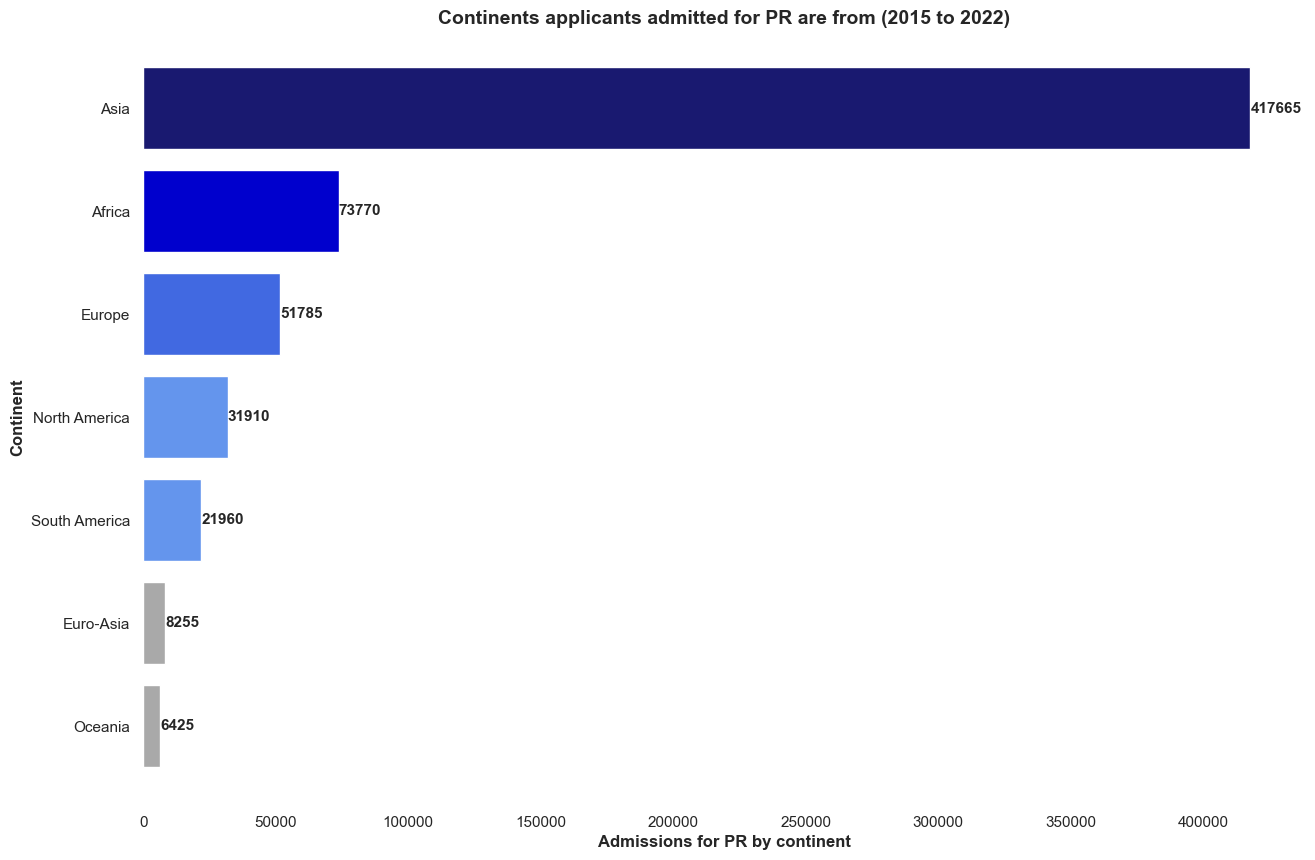

In [25]:
#Visualizing from 2015 to 2022 the continets applicants are from that got admitted for PR

#Plotting the bar chart
plt.barh(df_coc_continent_overall.index, 
        df_coc_continent_overall['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'], 
         color=['darkgrey',
                'darkgrey', 
                'cornflowerblue',
                'cornflowerblue', 
                'royalblue', 
                'mediumblue', 
                'midnightblue'])

plt.xlabel('Admissions for PR by continent', 
           fontsize=12,
           fontweight='bold')

plt.ylabel('Continent', 
           fontsize=12,
           fontweight='bold')

plt.title('Continents applicants admitted for PR are from (2015 to 2022)', 
          fontsize=14, 
          fontweight='bold')

#Adding data labels
x=df_coc_continent_overall.to_numpy()
y=df_coc_continent_overall.index.to_numpy()
labels = list(df_coc_continent_overall['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'])
for i in range(len(x)):
    plt.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')


plt.box(False)

plt.show()

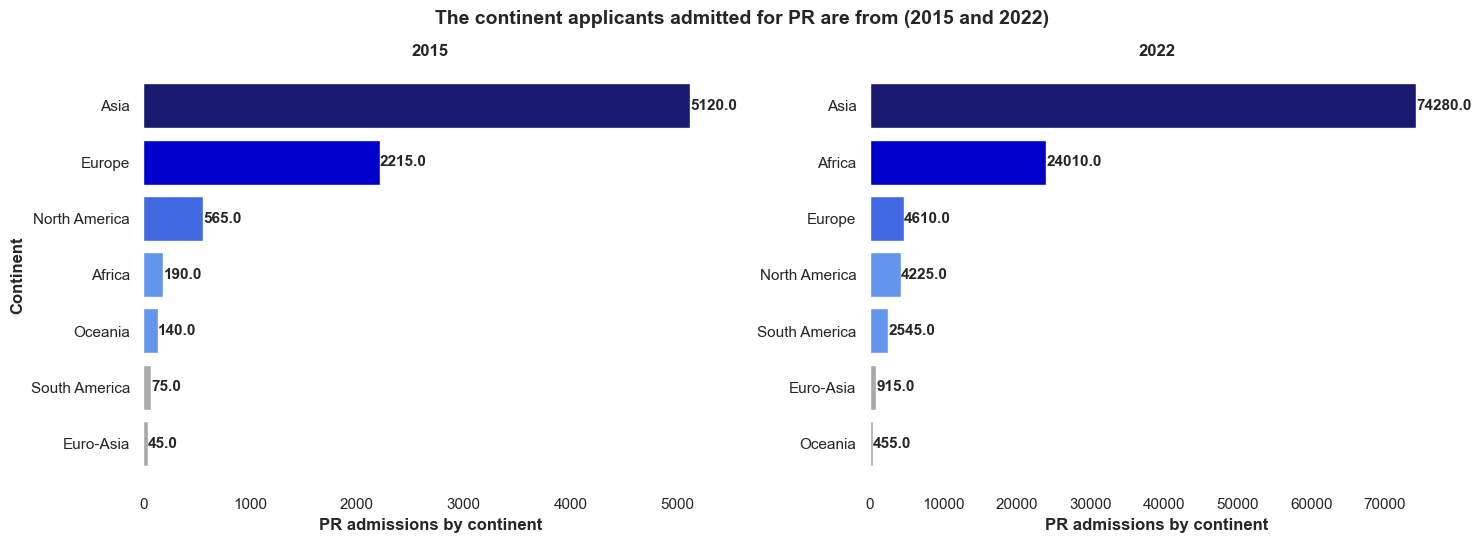

In [26]:
#Visualizing the PR admissions based on continent applicants are from (2015 and 2022)

#Filtering for the year 2015 then grouping by continent
df_coc_continent_2015 = df_country_of_citizenship\
                    .where(df_country_of_citizenship['Year']==2015)\
                    .groupby('Continent')\
                    .sum()\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship', 
                                 ascending=True)\
                    .drop('Year', 
                          axis=1)

#Filtering for the year 2022 then grouping by continent
df_coc_continent_2022 = df_country_of_citizenship\
                    .where(df_country_of_citizenship['Year']==2022)\
                    .groupby('Continent')\
                    .sum()\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship', 
                                 ascending=True)\
                    .drop('Year', 
                          axis=1) 
#Plotting the bar chats
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)

ax1.barh(df_coc_continent_2015.index, 
        df_coc_continent_2015['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'], 
         color =['darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax1.set_xlabel('PR admissions by continent', 
               fontsize=12, 
               fontweight='bold')

ax1.set_ylabel('Continent', 
               fontsize=12, 
               fontweight='bold')

ax1.set_title('2015', 
              fontsize=12, 
              fontweight='bold')

#Adding data labels
x=df_coc_continent_2015.to_numpy()
y=df_coc_continent_2015.index.to_numpy()
labels = list(df_coc_continent_2015['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'])
for i in range(len(x)):
    ax1.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')


ax1.set_frame_on(False)

ax2 = fig.add_subplot(2,2,2)

ax2.barh(df_coc_continent_2022.index, 
        df_coc_continent_2022['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'], 
         color=['darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax2.set_xlabel('PR admissions by continent', 
               fontsize=12, 
               fontweight='bold')

ax2.set_title('2022', 
              fontsize=12, 
              fontweight='bold')

#Plotting data labels
x=df_coc_continent_2022.to_numpy()
y=df_coc_continent_2022.index.to_numpy()
labels = list(df_coc_continent_2022['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'])
for i in range(len(x)):
    ax2.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')


ax2.set_frame_on(False)

plt.suptitle('The continent applicants admitted for PR are from (2015 and 2022)', 
             fontsize=14,
             fontweight='bold')

plt.tight_layout()

In [27]:
df_coc_continent_2015

,Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship
Continent,
Euro-Asia,45.0
South America,75.0
Oceania,140.0
Africa,190.0
North America,565.0
Europe,"2,215.0"
Asia,"5,120.0"


**COMMENTS ON CONTINENT**

Asia, Africa, and Europe are the top three continents where most express entry applications come from, but Asia tops the list by a huge margin. When the immigration program started in 2015, Europe was ahead of Africa in terms of applicants admitted for PR. However, as of 2022 Africa has overtaken Europe.


### Country of citizenship statistics

In [28]:
#Grouping the dataframe by country of citizenship
df_country_of_citizenship_overall = df_country_of_citizenship\
                                    .groupby('Country of Citizenship')\
                                    .sum()\
                                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship', 
                                                 ascending=True)\
                                    .iloc[-10:]\
                                    .drop('Year', 
                                          axis=1)

df_country_of_citizenship_overall

,Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship
Country of Citizenship,
Iran,8610
"Korea, Republic of",11000
Brazil,15690
United Kingdom and Overseas Territories,16715
Philippines,17215
Pakistan,18270
United States of America,20855
"China, People's Republic of",40365
Nigeria,42180


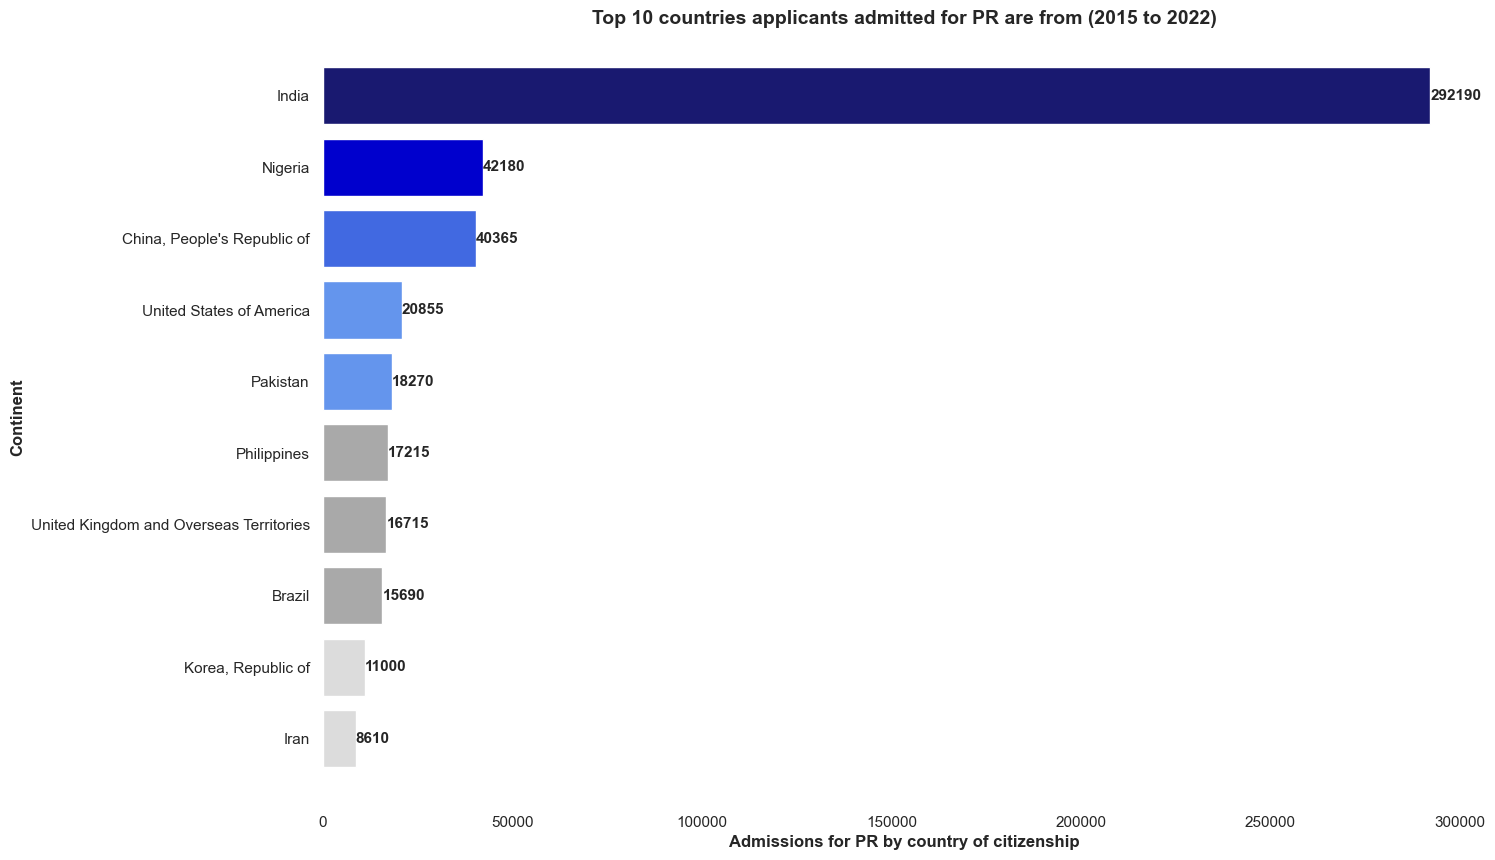

In [29]:
#Plotting bar chart
plt.barh(df_country_of_citizenship_overall.index, 
        df_country_of_citizenship_overall['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'], 
         color=['gainsboro', 
                 'gainsboro', 
                 'darkgrey', 
                 'darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

plt.xlabel('Admissions for PR by country of citizenship', 
           fontsize=12,
           fontweight='bold')

plt.ylabel('Continent', 
           fontsize=12,
           fontweight='bold')


plt.title('Top 10 countries applicants admitted for PR are from (2015 to 2022)', 
          fontsize=14, 
          fontweight='bold')

#Adding data labels
x=df_country_of_citizenship_overall.to_numpy()
y=df_country_of_citizenship_overall.index.to_numpy()
labels = list(df_country_of_citizenship_overall['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'])
for i in range(len(x)):
    plt.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')

plt.box(False)

plt.show()

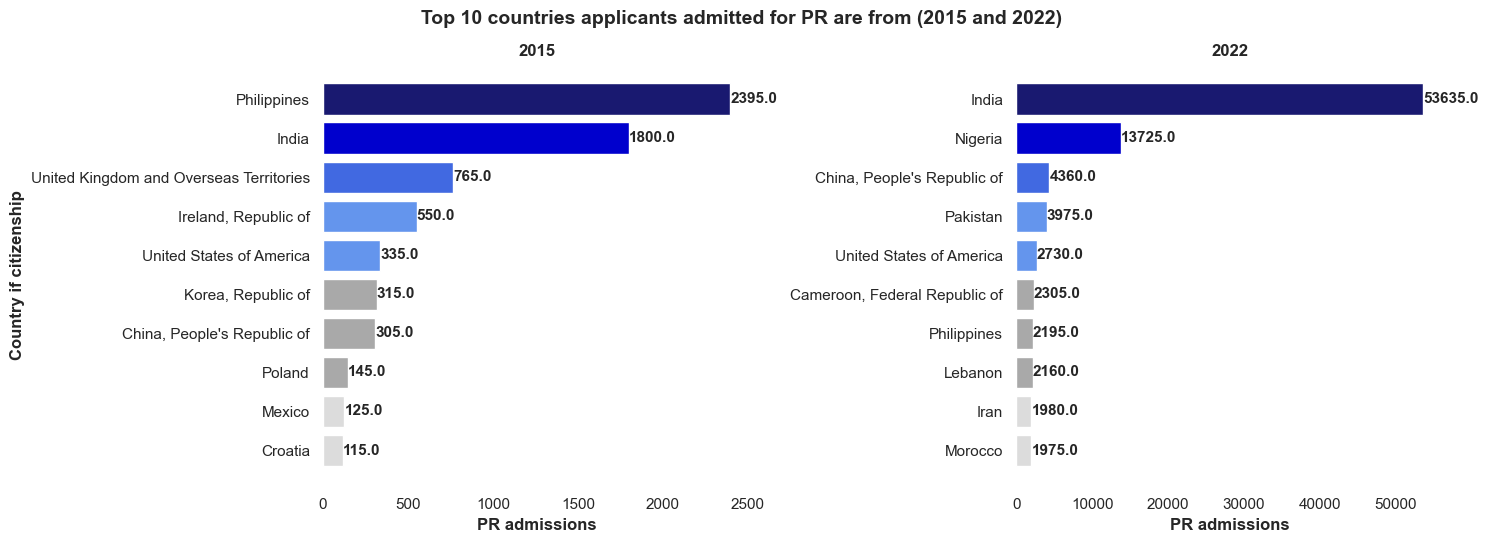

In [30]:
#Visualizing the PR admissions based on country of citizenship (2015 and 2022)

#Filtering for the year 2015 then grouping by country of citizenship

df_country_of_citizenship_2015 = df_country_of_citizenship\
                    .where(df_country_of_citizenship['Year']==2015)\
                    .groupby('Country of Citizenship')\
                    .sum()\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship', 
                                 ascending=True)\
                    .iloc[-10:]\
                    .drop('Year', 
                          axis=1) 
#Filtering for the year 2022 then grouping by country of citizenship
df_country_of_citizenship_2022 = df_country_of_citizenship\
                    .where(df_country_of_citizenship['Year']==2022)\
                    .groupby('Country of Citizenship')\
                    .sum()\
                    .sort_values(by='Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship', 
                                 ascending=True)\
                    .iloc[-10:]\
                    .drop('Year', 
                          axis=1) 
#Plotting bar charts
fig = plt.figure()
 
ax1 = fig.add_subplot(2,2,1)

ax1.barh(df_country_of_citizenship_2015.index, 
        df_country_of_citizenship_2015['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'], 
         color=['gainsboro', 
                 'gainsboro', 
                 'darkgrey', 
                 'darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax1.set_title('2015',
              fontsize=12, 
              fontweight='bold')

ax1.set_xlabel('PR admissions', 
               fontsize=12, 
               fontweight='bold')

ax1.set_ylabel('Country if citizenship', 
               fontsize=12, 
               fontweight='bold')

#Adding data labels
x=df_country_of_citizenship_2015.to_numpy()
y=df_country_of_citizenship_2015.index.to_numpy()
labels = list(df_country_of_citizenship_2015['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'])
for i in range(len(x)):
    ax1.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')

ax1.set_frame_on(False)

ax2 = fig.add_subplot(2,2,2)

ax2.barh(df_country_of_citizenship_2022.index, 
        df_country_of_citizenship_2022['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'], 
         color=['gainsboro', 
                'gainsboro', 
                'darkgrey', 
                'darkgrey',
                'darkgrey', 
                'cornflowerblue',
                'cornflowerblue', 
                'royalblue', 
                'mediumblue', 
                'midnightblue'])

ax2.set_title('2022',
              fontsize=12, 
              fontweight='bold')

ax2.set_xlabel('PR admissions', 
               fontsize=12, 
               fontweight='bold')

#Adding data labels
x=df_country_of_citizenship_2022.to_numpy()
y=df_country_of_citizenship_2022.index.to_numpy()
labels = list(df_country_of_citizenship_2022['Admissions of Permanent Residenst under Express Entry by Intended Destination and Country of Citizenship'])
for i in range(len(x)):
    ax2.text(x[i], y[i], labels[i], va="center", fontsize=11, fontweight='bold')

ax2.set_frame_on(False)

plt.suptitle('Top 10 countries applicants admitted for PR are from (2015 and 2022)', 
             fontsize=14, 
             fontweight='bold')

plt.tight_layout()

**COMMENTS ON COUNTRY OF CITIZENSHIP**

Since 2015 India has been dominating the number of applicants that receive PR. Nigeria is the number one African country with applicants receiving PR.

## Immigration category statistics

In [31]:
#Viewing the first 5 rows of the dataframe
df_immigration_category.head()

,Year,Month,Quarter,Immigration category,Province,Admission of Permanent Residence under Express Entry by Province/Immigration Category
0,2015,Jan,Q1,Canadian Experience,Newfoundland and Labrador,0
1,2015,Feb,Q1,Canadian Experience,Newfoundland and Labrador,0
2,2015,Mar,Q1,Canadian Experience,Newfoundland and Labrador,0
3,2015,Apr,Q2,Canadian Experience,Newfoundland and Labrador,0
4,2015,May,Q2,Canadian Experience,Newfoundland and Labrador,0


In [32]:
#Aggregating the PR admission for each immigration category by year in order to create a line chart to analyse trend
df_immigration_category_cec = df_immigration_category.where(df_immigration_category['Immigration category']=='Canadian Experience')\
                                .groupby('Year')\
                                .sum()

df_immigration_category_sw = df_immigration_category.where(df_immigration_category['Immigration category']=='Skilled Worker')\
                                .groupby('Year')\
                                .sum()

df_immigration_category_st = df_immigration_category.where(df_immigration_category['Immigration category']=='Skilled Trade')\
                                .groupby('Year')\
                                .sum()

df_immigration_category_pnp = df_immigration_category.where(df_immigration_category['Immigration category']=='Provincial Nominee Program')\
                                .groupby('Year')\
                                .sum()

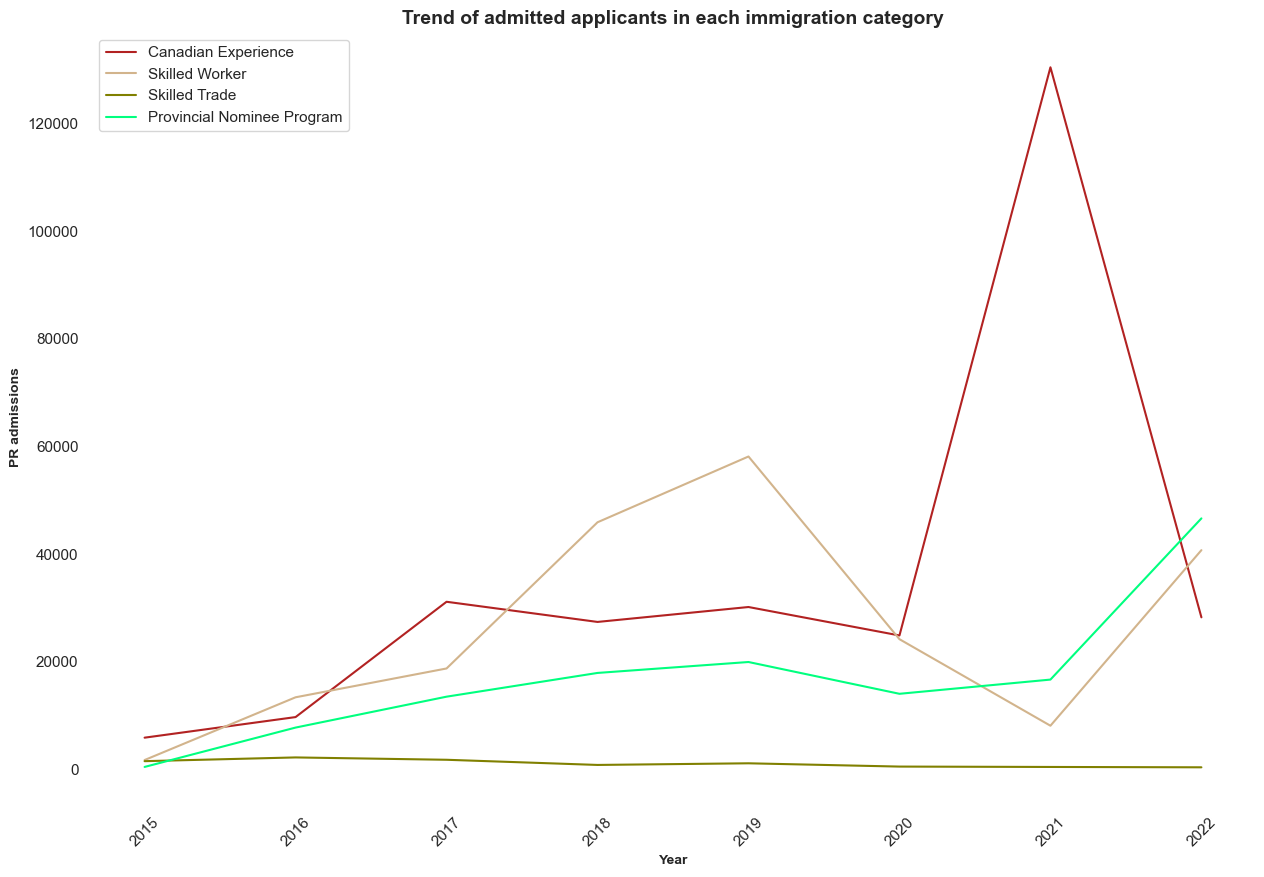

In [33]:
#Plotting line chart to analyse the trend of the immigration categories
ax = plt.axes()

ax.set_facecolor("white")

plt.plot(df_immigration_category_cec.index,
         'Admission of Permanent Residence under Express Entry by Province/Immigration Category', 
         data=df_immigration_category_cec,
         color='firebrick')

plt.plot(df_immigration_category_sw.index,
         'Admission of Permanent Residence under Express Entry by Province/Immigration Category', 
         data=df_immigration_category_sw, 
         color='tan')

plt.plot(df_immigration_category_st.index,
         'Admission of Permanent Residence under Express Entry by Province/Immigration Category',
         data=df_immigration_category_st, 
         color='olive')

plt.plot(df_immigration_category_pnp.index,
         'Admission of Permanent Residence under Express Entry by Province/Immigration Category', 
         data=df_immigration_category_pnp, 
         color='springgreen')

plt.title('Trend of admitted applicants in each immigration category',
          fontsize=14, 
          fontweight='bold')

plt.xlabel('Year',
           fontsize=10, 
           fontweight='bold')

plt.ylabel('PR admissions', 
           fontsize=10, 
           fontweight='bold')

plt.legend(['Canadian Experience', 'Skilled Worker', 'Skilled Trade', 'Provincial Nominee Program'])

plt.xticks(rotation=45)

plt.box(False)

plt.show()

**COMMENTS ON IMMIGRATION CATEGORY**

All categories faced a dip in admission post 2019 due to the pandemic which resulted in backlog of applications. However, the Canadian Experience has a spike in admission during covid.

In [34]:
#Grouping the dataframe by country of citizenship
df_immigration_category_province = df_immigration_category\
                                    .groupby('Province')\
                                    .sum()\
                                    .sort_values(by='Admission of Permanent Residence under Express Entry by Province/Immigration Category', 
                                                 ascending=False)\
                                    .drop('Year', 
                                          axis=1)

df_immigration_category_province.style.background_gradient(cmap='Blues').format('{:,}')

,Admission of Permanent Residence under Express Entry by Province/Immigration Category
Province,
Ontario,"374,565"
British Columbia,"125,905"
Alberta,"70,820"
Saskatchewan,"21,490"
Nova Scotia,"20,545"
Manitoba,"14,445"
New Brunswick,"11,295"
Prince Edward Island,"4,040"
Newfoundland and Labrador,"1,575"


**COMMENTS ON PROVINCE**

From 2015 to 2022 these are the number of applicants given PR based on their intended Province with Ontario having the most admissions.

**CREATING MAP OF CANADA**

In [36]:
canada = gpd.read_file("lpr_000b16a_e.shp")
canada.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."


In [38]:
canada_province_merged = canada.merge(df_immigration_category_province, 
                                      left_on="PRENAME",
                                      right_on=df_immigration_category_province.index)
canada_province_merged

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry,Admission of Permanent Residence under Express Entry by Province/Immigration Category
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",1575
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",4040
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",20545
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",11295
4,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",374565
5,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",14445
6,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640...",21490
7,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463...",70820
8,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194...",125905
9,60,Yukon,Yukon,Yukon,Y.T.,Yn,"MULTIPOLYGON (((4593284.320 4180399.606, 45933...",145


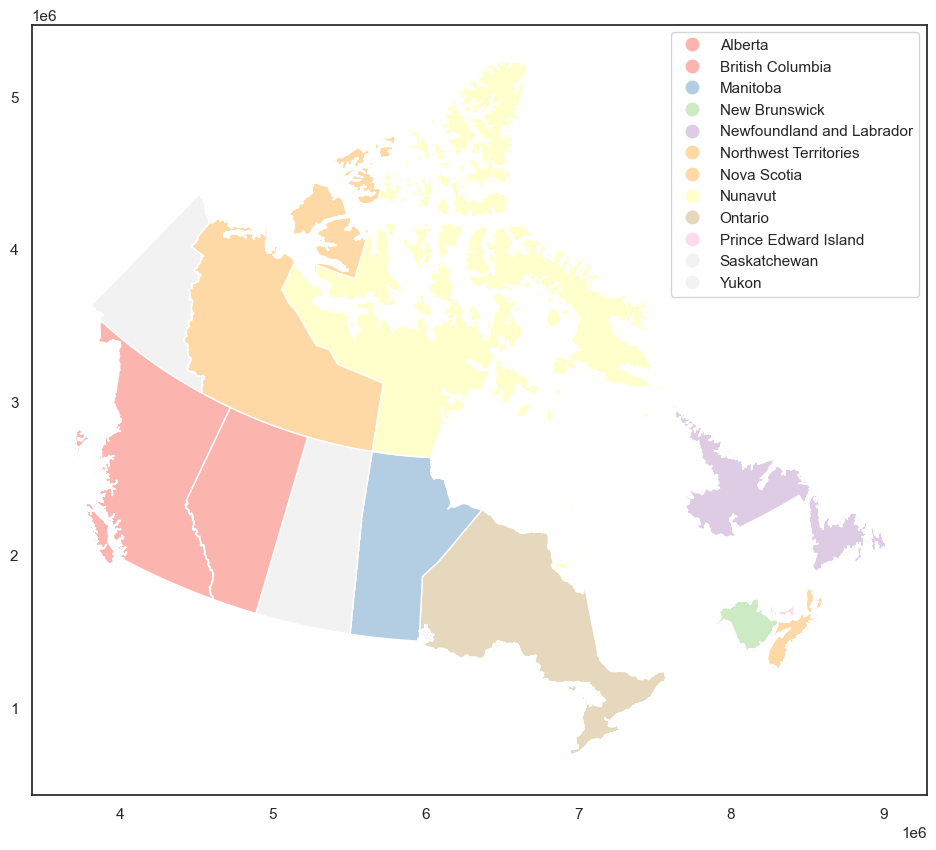

In [67]:
canada_province_merged.plot(column='PRENAME', 
                            cmap = 'Pastel1',
                            legend = True)
plt.show()